# SEGUNDO PUNTO PRUEBA DE SELECCIÓN BIT
ASPIRANTE: John Muñoz

In [197]:
# Carga de las respectivas librerias
import glob
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import keras
from keras.utils import np_utils
from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

Las imagenes para entrenar el DataSet se encuentran en la carpeta figuras - se indexa desde 0

imagenes que se cargaron: 
18


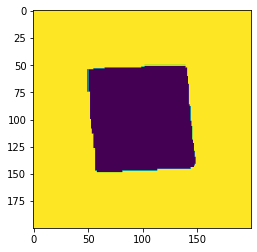

In [198]:
# Carga de las respectivas librerias
X = [cv2.imread(file,0) for file in glob.glob("figuras/*.png")]
# Se realiza la selección del indice para probar la carga exitosa de las imagenes
prueba= X[17]
plt.imshow(prueba)
print("imagenes que se cargaron: ")
print(len(X))

Se define un modelo CNN, el cuál reconoce las caracteristicas de las imagenes aplicando convolución y algoritmos de identificación de las imagenes.

In [199]:
def modelo_clasificador():
    model=Sequential()
    model.add(Conv2D(8, (20, 20), activation='relu', input_shape=(1,200,200),data_format='channels_first'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dense(4,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

De las 18 imagenes se crea la respectiva etiqueta las 6 primeras equivalen a circulos, las 6 siguientes a cuadrados que corresponden al número 2 y las 6 últimas a triangulos.

Se emplea el comando categorical, con el fin de expresar la información como datos entre 0 y 1
así por ejemplo 3 equivale a [0. 0. 1. 0.]

In [212]:
# Vector con el equivalente a cada imagen.
Y= [1,1,1,1,1,1,1,2,2,2,2,2,2,2,3,3,3,3]

# De las 18 imagenes se emplea el 80% para entrenamiento y las demas para hacer el test.
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,test_size=0.2)

# Se hace el cambio de nomenclatura de train_X a Train_x porque se convierten las listas en arreglos de numpy
Train_X = np.array(train_X).astype('float32')
Test_X = np.array(test_X).astype('float32')
Train_X = Train_X / 255.
Test_X = Test_X / 255.
y_train=np_utils.to_categorical(train_Y)
y_test=np_utils.to_categorical(test_Y)

# Se imprimen los datos de ingreso a la red neuronal
print ("Forma Matriz de entrenamiento: ",Train_X.shape)
print ("Forma Matriz de validación: ",Test_X.shape)
print ("Forma Matriz de entrenamiento objetivos: ",y_train.shape)
print ("Forma Matriz de validación: ",y_test.shape)

)


Forma Matriz de entrenamiento:  (14, 200, 200)
Forma Matriz de validación:  (4, 200, 200)
Forma Matriz de entrenamiento objetivos:  (14, 4)
Forma Matriz de validación:  (4, 4)
------------------------- Datos adecuados --------------------------
Forma Matriz de entrenamiento:  (14, 1, 200, 200)
Forma Matriz de validación:  (4, 1, 200, 200)


Para la adecuación de la red neuronal, se ajusta la matriz de entrada de entrenamiento 
porque la forma que tiene (14,200,200) no coincide con la entrada de la red neuronal 
porque esta solicita un canal adicional (14,1,200,200

In [ ]:
print ("------------------------- Datos adecuados --------------------------")
Train_X=Train_X.reshape(Train_X.shape[0],1,200,200).astype('float32')
Test_X=Test_X.reshape(Test_X.shape[0],1,200,200).astype('float32')
print ("Forma Matriz de entrenamiento: ",Train_X.shape)
print ("Forma Matriz de validación: ",Test_X.shape)

Por último se realiza la etapa de entrenamiento de la red, con 10 repeticiones

In [213]:
model=modelo_clasificador()
model.summary()
model.fit(Train_X, y_train, validation_data=(Test_X,y_test),epochs=10,batch_size=14,verbose=2)


Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 8, 181, 181)       3208      
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 4, 90, 181)        0         
_________________________________________________________________
dropout_55 (Dropout)         (None, 4, 90, 181)        0         
_________________________________________________________________
flatten_54 (Flatten)         (None, 65160)             0         
_________________________________________________________________
dense_106 (Dense)            (None, 128)               8340608   
_________________________________________________________________
dense_107 (Dense)            (None, 4)                 516       
Total params: 8,344,332
Trainable params: 8,344,332
Non-trainable params: 0
___________________________________________

Se realiza la predicción de la figura en donde se obtiene el mayor puntaje en la posición donde se supone que se encuentra

In [221]:
prediction = model.predict(Test_X[3].reshape(1,1,200,200))
print(prediction)

[[0.02840631 0.46210507 0.06365821 0.44583043]]


(1, 200, 200)


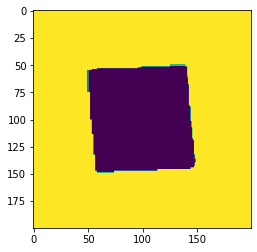

In [196]:
print(Test_X[3].shape)
plt.imshow(Test_X[3].reshape(200,200))

Donde el mayor puntaje(0.46) se encuentra en la 1 que equivale a circulos, lo cuál indica que le faltan más iteraciones e imagenes al sistema